In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test,y_test) = mnist.load_data() ### Load data into variables

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
x_test.shape

(10000, 28, 28)

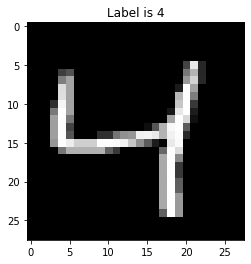

In [6]:
label = y_train[2]
pixels = x_train[2]
pixels = np.array(pixels, dtype='uint8')
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

In [7]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])   ## (28x28),(28*28,1 )

In [8]:
x_train.shape

(60000, 784)

In [9]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [10]:
x_test.shape

(10000, 784)

In [11]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [12]:
from keras.utils import np_utils

In [13]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
model = Sequential()

Metal device set to: Apple M1


2022-12-19 11:29:37.769998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-19 11:29:37.770348: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
model.add(Dense(32,input_shape=(784,)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [19]:
model.fit(x_train,y_train,epochs=10,batch_size=200, validation_data=(x_test,y_test))

Epoch 1/10


2022-12-19 11:29:38.305570: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-19 11:29:38.502376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


297/300 [============================>.] - ETA: 0s - loss: 0.6677 - accuracy: 0.7903

2022-12-19 11:29:42.402703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/300 [==============================] - 4s 9ms/step - loss: 0.6643 - accuracy: 0.7914 - val_loss: 0.2555 - val_accuracy: 0.9225
Epoch 2/10
300/300 [==============================] - 2s 8ms/step - loss: 0.3129 - accuracy: 0.9087 - val_loss: 0.1919 - val_accuracy: 0.9410
Epoch 3/10
300/300 [==============================] - 2s 8ms/step - loss: 0.2558 - accuracy: 0.9246 - val_loss: 0.1710 - val_accuracy: 0.9478
Epoch 4/10
300/300 [==============================] - 2s 8ms/step - loss: 0.2260 - accuracy: 0.9340 - val_loss: 0.1499 - val_accuracy: 0.9520
Epoch 5/10
300/300 [==============================] - 2s 8ms/step - loss: 0.2063 - accuracy: 0.9393 - val_loss: 0.1420 - val_accuracy: 0.9551
Epoch 6/10
300/300 [==============================] - 2s 8ms/step - loss: 0.1873 - accuracy: 0.9443 - val_loss: 0.1318 - val_accuracy: 0.9594
Epoch 7/10
300/300 [==============================] - 2s 8ms/step - loss: 0.1765 - accuracy: 0.9475 - val_loss: 0.1294 - val_accuracy: 0.9596
Epoch 8/10
300/30